<a href="https://colab.research.google.com/github/Adam129511/sieci2/blob/main/Sie%C4%87_konwolucyjna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Konwolucyjna Sieć Neuronowa - MNIST

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych:{}'.format (x_train.shape[0]))
print('Liczba danych testowych:', x_test.shape[0])
print('Rozmiar pojedynczego obrazka:{}'.format (x_train[0].shape))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka:(28, 28)


(-0.5, 27.5, 27.5, -0.5)

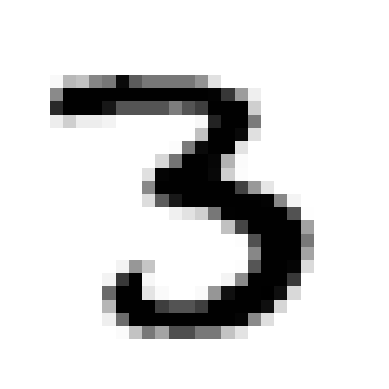

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[12],cmap='Greys')
plt.axis('off')

In [6]:
print(keras.backend.image_data_format()) #Prezentuje format zapisu danych

channels_last


In [7]:
img_rows, img_cols = 28,28 #Ustawienie formatu
if keras.backend.image_data_format() == 'channel_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(input_shape)

(28, 28, 1)


Standaryzacja danych

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_test /= 255
x_train /= 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes= 10)
y_test = keras.utils.to_categorical(y_test, num_classes= 10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Budowa Modelu

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1) ))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [14]:
model.compile(optimizer='adadelta',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'] )

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
469/469 [==============================] - 173s 370ms/step - loss: 2.2617 - accuracy: 0.3155 - val_loss: 2.2232 - val_accuracy: 0.4991
Epoch 2/20
469/469 [==============================] - 172s 368ms/step - loss: 2.1773 - accuracy: 0.5405 - val_loss: 2.1198 - val_accuracy: 0.5861
Epoch 3/20
469/469 [==============================] - 176s 376ms/step - loss: 2.0494 - accuracy: 0.5948 - val_loss: 1.9576 - val_accuracy: 0.6302
Epoch 4/20
469/469 [==============================] - 171s 365ms/step - loss: 1.8444 - accuracy: 0.6479 - val_loss: 1.6975 - val_accuracy: 0.6835
Epoch 5/20
469/469 [==============================] - 168s 358ms/step - loss: 1.5433 - accuracy: 0.7076 - val_loss: 1.3558 - val_accuracy: 0.7505
Epoch 6/20
 92/469 [====>.........................] - ETA: 2:06 - loss: 1.3378 - accuracy: 0.7411